<a href="https://www.kaggle.com/code/hikmatullahmohammadi/house-price-prediction-eda-step-by-step?scriptVersionId=123197084" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a name='0'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
House Price Prediction + EDA    
</h1>

<div style='padding:20px; background:lightblue;color:black;border-radius:10px'>
  <h1>Easy Navigation</h1>
    <hr />
    <li><a href='#1' style='color: black;text-decoration:underline'>
        1- Data exploration & preparation </a>
    </li>
    <li>
        <a href='#2' style='color: black;text-decoration:underline'>
          2- Explanatory Data Analysis (EDA)</a>
          <ul>
            <li><a href='#2-1' style='color: black;text-decoration:underline'>
                2.1- Categorical features</a>
            </li>
            <li><a href='#2-2' style='color: black;text-decoration:underline'>
                2.2- Numerical features</a>
            </li>
          </ul>
    </li>
    <li><a href='#3' style='color: black;text-decoration:underline'>
    3- Modeling</a>
    </li>
</div>

<div style='padding:20px; background:lightblue;color:black;border-radius:10px'>
  <h1>Dataset Description:</h1>
    <hr />
    <b>Context:</b><br />
    The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues
</div>

[Link to the dataset used in this kernel](https://www.kaggle.com/datasets/shree1992/housedata)

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# import the dataset
df = pd.read_csv('/kaggle/input/housedata/data.csv')

In [3]:
h_df = df.copy()

<a name='1'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    1- Data exploration & preparation
    </h1>

In [4]:
h_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# the number of rows (observations) and columns (features)
h_df.shape

(4600, 18)

In [6]:
# to see the features' datatypes and
# to make sure the datatypes are what we expect. 
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    We can see that the datatypes of floors, bathrooms and bedrooms are not of expected types (they can't be of type float).
    </div>

In [7]:
# change the dtype of floors, bedrooms and bathrooms to 'int'
h_df[['floors', 'bathrooms', 'bedrooms']] = \
    h_df[['floors', 'bathrooms', 'bedrooms']].astype('int')

In [8]:
# some statistical values to see how data are distributed (numerical features)
pd.set_option('display.float_format', lambda x: format(x, '.2f'))
h_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,1.79,2139.35,14852.52,1.46,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.75,963.21,35884.44,0.55,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.00,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.00,1980.00,7683.00,1.00,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.00,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.00,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [9]:
# observe the number of rows where the price is 0
(h_df['price']==0).sum(0)

49

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    We can see that there are <b>49</b> houses of which price is <b>0</b>. Since a house's price can't be 0, we consider them missing values
    </div>

In [10]:
# replace 0s with NaN
h_df['price'].replace(0, np.nan, inplace=True)

In [11]:
# replace the NaN values of price feature with its mean value
h_df['price'].fillna(value=h_df['price'].mean(), inplace=True)

<a name=''></a>
<h2 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    Handling Outliers
</h2>

<div style='padding:10px; background:lightblue;color:black;border-radius:10px'>
<p>
  Here, we will use <b>IQR</b> tecknique to detect outliers in some features of the dataset. <b>It is defined as the difference between the 75th and 25th percentiles of the data.</b>
  That is, every value which is out of this range (25th-75th percentiles) is considered outlier.
</p>
<p>
  The image bellow from  <a href="https://www.baeldung.com">https://www.baeldung.com</a> can clearly explain <b>IQR</b>.
  <hr>
  <img src="https://www.baeldung.com/wp-content/uploads/sites/4/2021/12/outliers-detection-boxplot.drawio-1.png" alt="iqr">
</p>
<b>All values which lay out of the range <b>(1st Quartile - 3rd Quartile)</b> are considered outliers/extreme values.</b>
</div>

In [12]:
# let's see how the features are distributed: which features are more likely to have outliers
h_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,557905.90,3.40,1.79,2139.35,14852.52,1.46,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,560917.63,0.91,0.75,963.21,35884.44,0.55,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,7800.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,328158.93,3.00,1.00,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,468750.00,3.00,2.00,1980.00,7683.00,1.00,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.00,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.00,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


<div style='padding:10px; background:lightgreen;border-radius:5px'>
    Examining the chart above, we can see that <b>'price', 'sqft_lot' and 'sqft_basement'</b> features' values are not distributed equally; they are more likely to contain extreme values. Hence, we will extract these features, and handle their outliers in the cells bellow.
    </div>

In [13]:
# the function to replace outliers with nan
def replace_outliers_with_nan_iqr(df, feature, inplace=False):
    desired_feature = df[feature]
    
    q1, q3 = desired_feature.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [14]:
# features_with_outlier: we can learn this from the above chart
features_with_outlier = ['price', 'sqft_lot', 'sqft_basement']

In [15]:
# handle the outliers: replace them by the mean of each feature

# get means
features_means = h_df[features_with_outlier].mean()
# iterate through features with outliers
for i in features_with_outlier:
    replace_outliers_with_nan_iqr(h_df, i, inplace=True)

# replace np.nan by the mean values
h_df.fillna(features_means, inplace=True)
h_df.isnull().sum().sum()

0

---

In [16]:
# drop insignificant features
h_df.drop(['street', 'date', 'country'], axis=1, inplace=True)

In [17]:
# Change city names, and statezip to numerric vlaues starting from 0 
h_df['city'], _ = pd.factorize(h_df['city'])
h_df['statezip'], _ = pd.factorize(h_df['statezip'])

In [18]:
h_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00,3,1,1340,7912.00,1,0,0,3,1340,0.00,1955,2005,0,0
1,557905.90,5,2,3650,9050.00,2,0,4,5,3370,280.00,1921,0,1,1


---

<a name='2'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    2- Explanatory Data Analysis (EDA)
</h1>

<div style='padding:10px; background:lightgreen;border-radius:8px'>
In this section, we will first look at the distributions of categorical variables, and then we will visualize how the numeric features are distributed.
    </div>

In [19]:
# Utils

# draw a boxen of a categorical variable along with
# how it effects the target variable which is in this case 'price'
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.boxenplot(data=df, x=feature, y='price')
    ax.set_title(f'{feature} vs price', fontdict={'fontsize': 18})

# draw the countplot of a categorical variable
def draw_cate_countplot(df, feature):
    plt.grid(True)
    ax = sns.countplot(x=df[feature])
    ax.set_title(f'{feature}\'s count', fontdict={'fontsize': 18})
    
# draw distribution plot for a numeric feature
def draw_numeric_dist(df, feature):
    ax = sns.kdeplot(df[feature], fill=True)
    plt.grid(True)
    ax.set_title(f'{feature}\'s distribution', fontdict={'fontsize': 18})

# draw scatter plot for a numeric feature vs price
def draw_numeric_target_scatter(df, feature):
    ax = sns.scatterplot(data=df, x=feature, y='price')
    ax.set_title(f'{feature} vs price', fontdict={'fontsize': 18})
    plt.grid(True)

In [20]:
h_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00,3,1,1340,7912.00,1,0,0,3,1340,0.00,1955,2005,0,0
1,557905.90,5,2,3650,9050.00,2,0,4,5,3370,280.00,1921,0,1,1
2,342000.00,3,2,1930,11947.00,1,0,0,4,1930,0.00,1966,0,2,2
3,420000.00,3,2,2000,8030.00,1,0,0,4,1000,1000.00,1963,0,3,3
4,550000.00,4,2,1940,10500.00,1,0,0,4,1140,800.00,1976,1992,4,4


In [21]:
# extract categorical and numerical features
cate_features = [
    'bedrooms',
    'bathrooms',
    'floors',
    'waterfront',
    'view',
    'condition'
]
numeric_features = list(set(h_df.columns)  - set(cate_features))

<a name='2-1'></a>
<h2 style='padding:20px; background:lightblue;color:black;border-radius:8px'>
    2.1- Categorical variables
</h2>

**1-bedrooms**

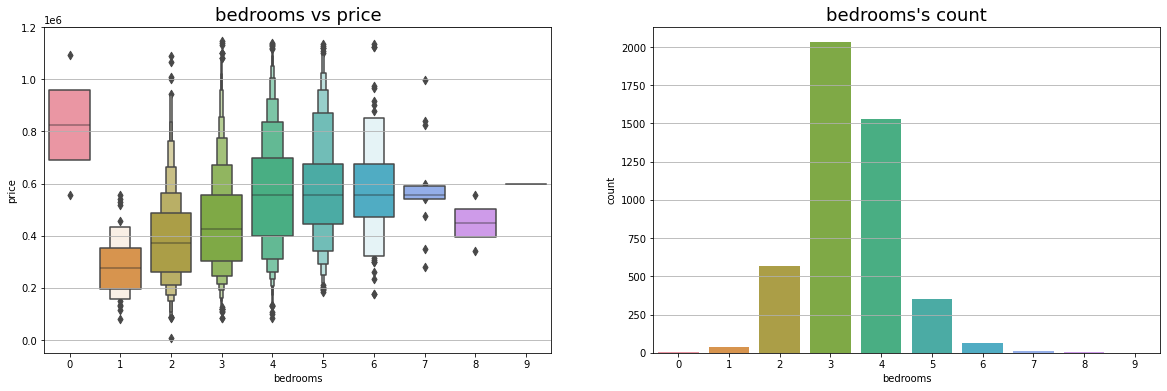

In [22]:
# draw a boxen plot of bedrooms vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[0])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[0])
plt.show()  

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    <b>Insights:</b><br />
    - The majority of houses in this dataset has 3 bebrooms. <br />
    - All the houses in this dataset has 0 to 9 bedrooms. <br />
    - Usually, the number of bedrooms directly effects the price of a house. That is, the price goes up when the number of bedrooms increases. <br />
    - An exception is when the number of bedrooms is 0, the price is the highest
</div>

**2- bathrooms**

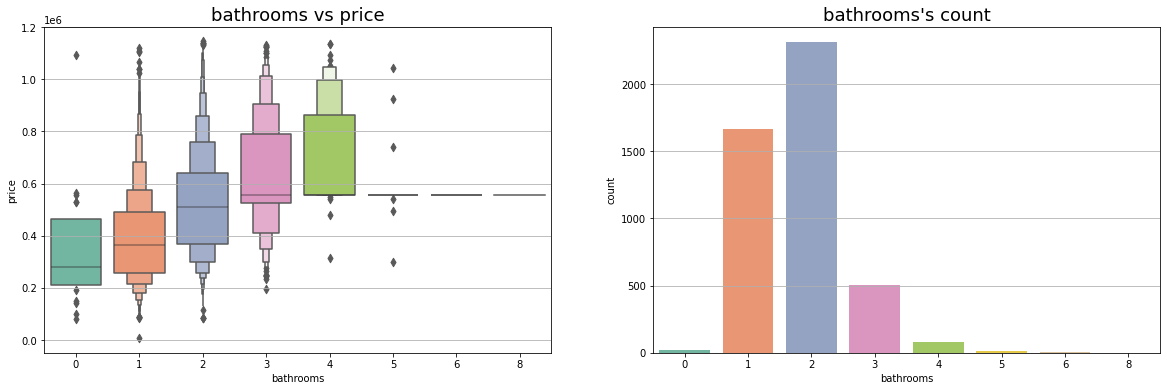

In [23]:
# draw a boxen plot of bathrooms vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[1])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[1])
plt.show()

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    <b>Insights:</b><br />
    - The majority of houses in this dataset has 2 bathrooms. <br />
    - All houses in this dataset has 0 to 8 bathrooms. <br />
    - The number of bathrooms directly effects the price of a house. That is, the price goes up when the number of bathrooms increases, and vice versa.
</div>

**3- floors**

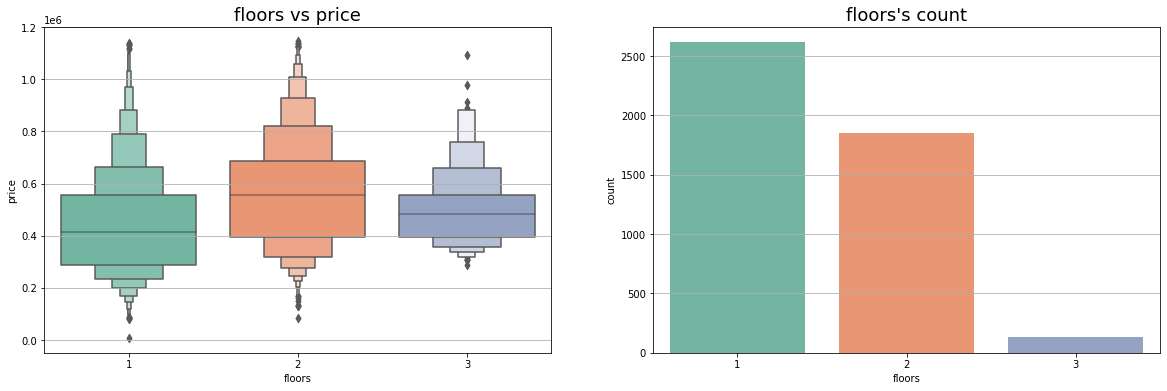

In [24]:
# draw a boxen plot of floors vs price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[2])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[2])
plt.show()  

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    <b>Insights:</b><br />
    - Most of the houses in this dataset has only 1 floor.<br />
    - All the houses in this dataset has 1 to 3 floors. <br />
    - The prices of the majority of houses with 2 floors are higher than those of 1 or 3 floors. <br />
    - The houses with only 1 floor has the lowest average price.
</div>

**4- waterfront**

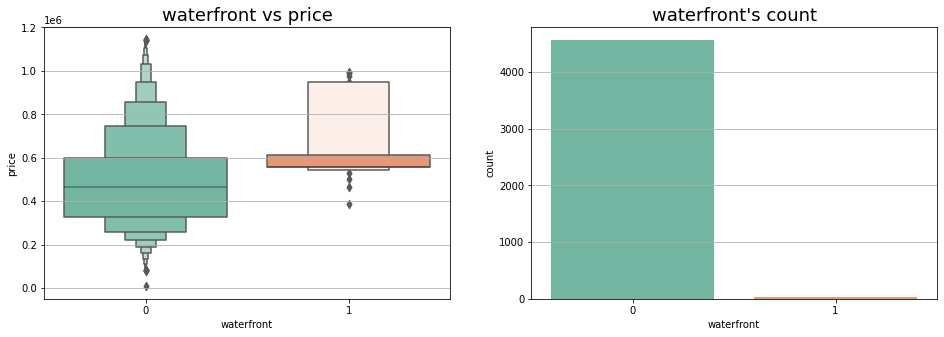

In [25]:
# draw a boxen plot of waterfront vs price
plt.figure(figsize=(16, 5))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[3])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[3])
plt.show()

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    <b>Insights:</b><br />
    - The majority of the houses in this dataset do not have a waterfront. <br />
    - The prices of the houses with a frontwater are higher than those without one.
</div>

**5- view**

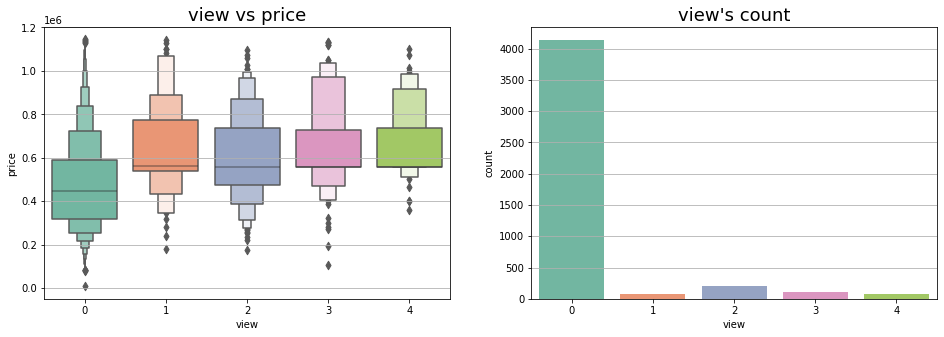

In [26]:
# draw a boxen plot of view vs price
plt.figure(figsize=(16, 5))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[4])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[4])
plt.show()

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    <b>Insights:</b><br />
    - Most of the houses in this dataset do not have a view. <br />
    - The prices of the houses with a view are higher than those without one.
</div>

**6- condition**

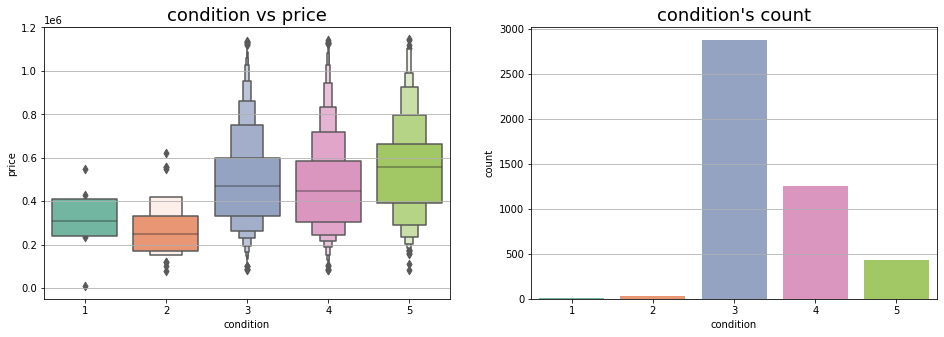

In [27]:
# draw a boxen plot of condition vs price
plt.figure(figsize=(16, 5))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(h_df, cate_features[5])

plt.subplot(1, 2, 2)
draw_cate_countplot(h_df, cate_features[5])
plt.show()

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    <b>Insights:</b><br />
    - All the houses in this dataset has condition [level] from 1 to 5. <br />
    - Most of the houses in this dataset has condition [level] 3.<br />
    - The average price of houses with a condition [level] of 5 is the highest, being followed by that of 3 and 4. <br />
    - The lowest average price belongs to houses with a condition [level] of 2.
</div>

---

<a name='2-2'></a>
<h2 style='padding:20px; background:lightblue;color:black;border-radius:8px'>
    2.2- Numeric variables
</h2>

In [28]:
numeric_features

['price',
 'yr_built',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_renovated',
 'city',
 'statezip',
 'sqft_basement']

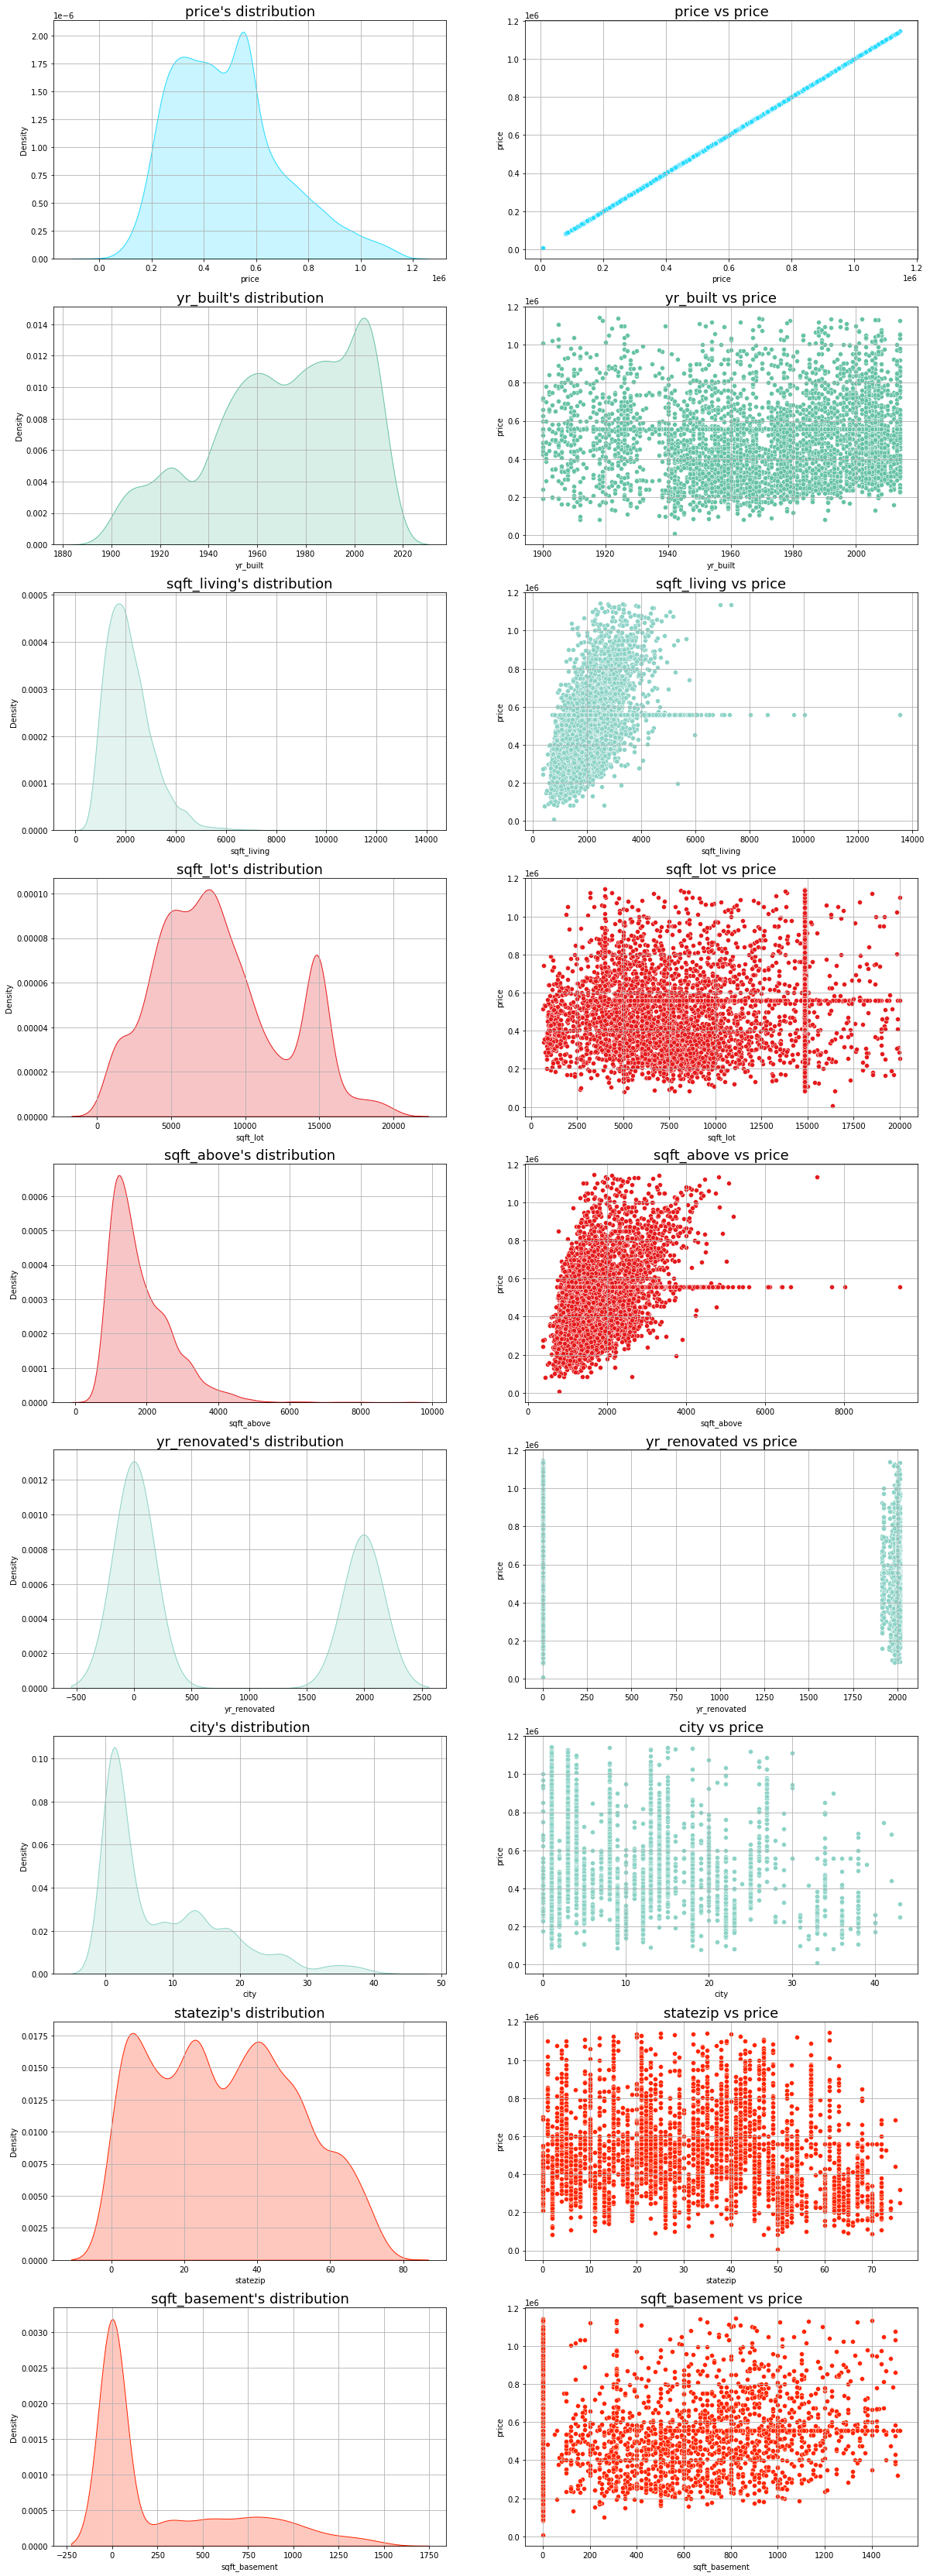

In [29]:
# draw some plots for all numeric features [+ vs price]
plt.figure(figsize=(20, 60))

palettes = ['Set1', 'Set2', 'Set3', 'autumn', 'cool']
for i, feature in enumerate(numeric_features):
    sns.set_palette(random.choice(palettes))
    # distribution
    plt.subplot(len(numeric_features), 2, i+i+1)
    draw_numeric_dist(h_df, feature)
    # scatter
    plt.subplot(len(numeric_features), 2, i+i +2)
    draw_numeric_target_scatter(h_df, feature)
    
plt.show()

<div style='padding:10px; background:lightgreen;border-radius:5px'>
    <b>Insights:</b><br />
    :TODO in the future versions
</div>

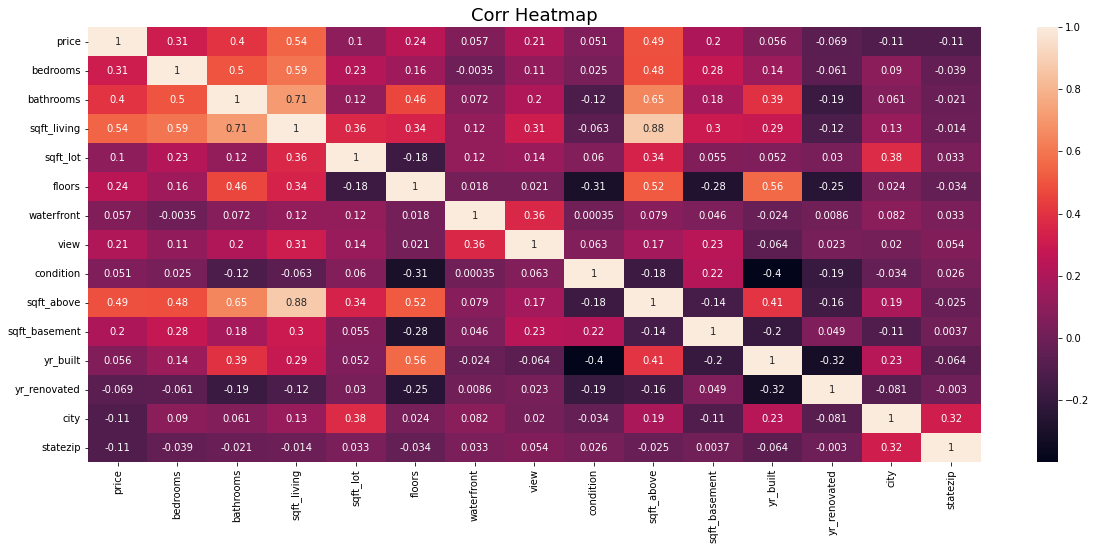

In [30]:
# heatmap of correlation between features
plt.figure(figsize=(20, 8))
ax = sns.heatmap(h_df.corr(), annot=True)
ax.set_title('Corr Heatmap', fontdict={'fontsize': 18})
plt.show()

<a name='3'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    3- Modeling
</h1>

In [31]:
X = h_df.drop('price', axis=1)
y = h_df['price']

### Feature selection using mutual information

<div style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    <b>Mutual Information (MI)</b> is a way to how every feature interact with the target variable
in this case 'price'. Here to interact means how a particular feature changes the target variable.
The higher the score, the stronger the interaction.<br />
    <b>Note: Mutual Information only works with numerrical data</b>
    </div>

In [32]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(X, y):
    mi = mutual_info_regression(X, y, random_state=10)
    mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi

In [33]:
# display Mutual Information scores of the features
mi_score = get_mi_score(X, y)
mi_score

statezip        0.38
sqft_living     0.32
city            0.30
sqft_above      0.22
bathrooms       0.15
yr_built        0.09
sqft_lot        0.07
bedrooms        0.06
floors          0.05
sqft_basement   0.05
view            0.04
waterfront      0.01
condition       0.01
yr_renovated    0.00
dtype: float64

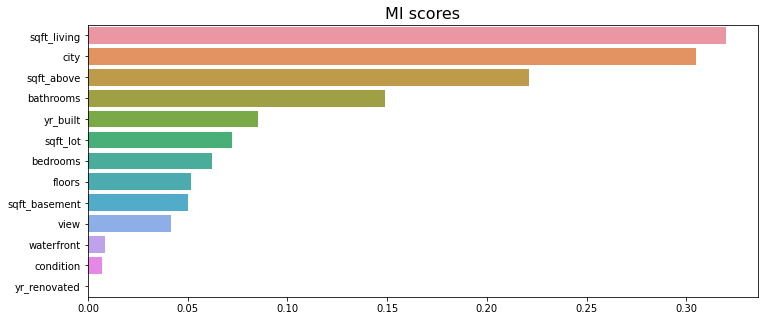

In [34]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y=mi_score.index[1:], x=mi_score[1:])
ax.set_title('MI scores', fontdict={'fontsize': 16})
plt.show()

<div style='padding:10px; background:lightgreen;border-radius:5px'>
You can see that yr_renovated has the minimum MI score (0.0017), which means it is the least effective variable, so we may consider removing it.
</div>

In [35]:
# drop yr_renovated
X.drop(['yr_renovated'], axis=1, inplace=True)

---

In [36]:
# split the trianing and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [37]:
# fit the dataset to the model
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)

# make prediction of X_test
y_pred = model.predict(X_test)

In [38]:
# Check the accuracy of the model
from sklearn.metrics import mean_squared_error
# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
# MSE
mse = mean_squared_error(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)

MSE:  14567766353.560734
RMSE:  120697.00225590002


<div style='padding:20px; background:lightblue;color:black;border-radius:10px'>
  <h1>Thanks :)</h1>
  <p>
    By: <br>
    <a href="https://kaggle.com/hikmatullahmohammadi">Hikmatullah Mohammadi</a>
  </p>
  <p><a href="#0">Go to top</a></p>
</div>